In [52]:
import numpy as np
import pandas as pd
import scipy

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
import seaborn as sns

# Method implementation

In [185]:
def principal_compnent_analysis(X, m=1):
    u, d, v = np.linalg.svd(X)
    max_indices = np.argsort(-d)

    w = v[max_indices[:m]]
    if m == 1:
        w = w[0]
    w = w.T
    Z = np.dot(X,w)
    if Z.ndim == 1:
        Z = Z.reshape((Z.shape[0],1))
    return Z

# Data

### Visualize correlation and histogram

In [200]:
def visualize_corr(data, target):
    df = pd.DataFrame(data, columns = range(1,data.shape[1]+1))
    df['target'] = target
    #df['target'] = df['target'].apply(lambda x: '"1"' if x == 1 else '"0"' if x == 0 else 'class 3')#astype(str)
    sns.pairplot(df, hue = 'target')
    plt.show()
    print(df.corr())
    return

### Generate dataset

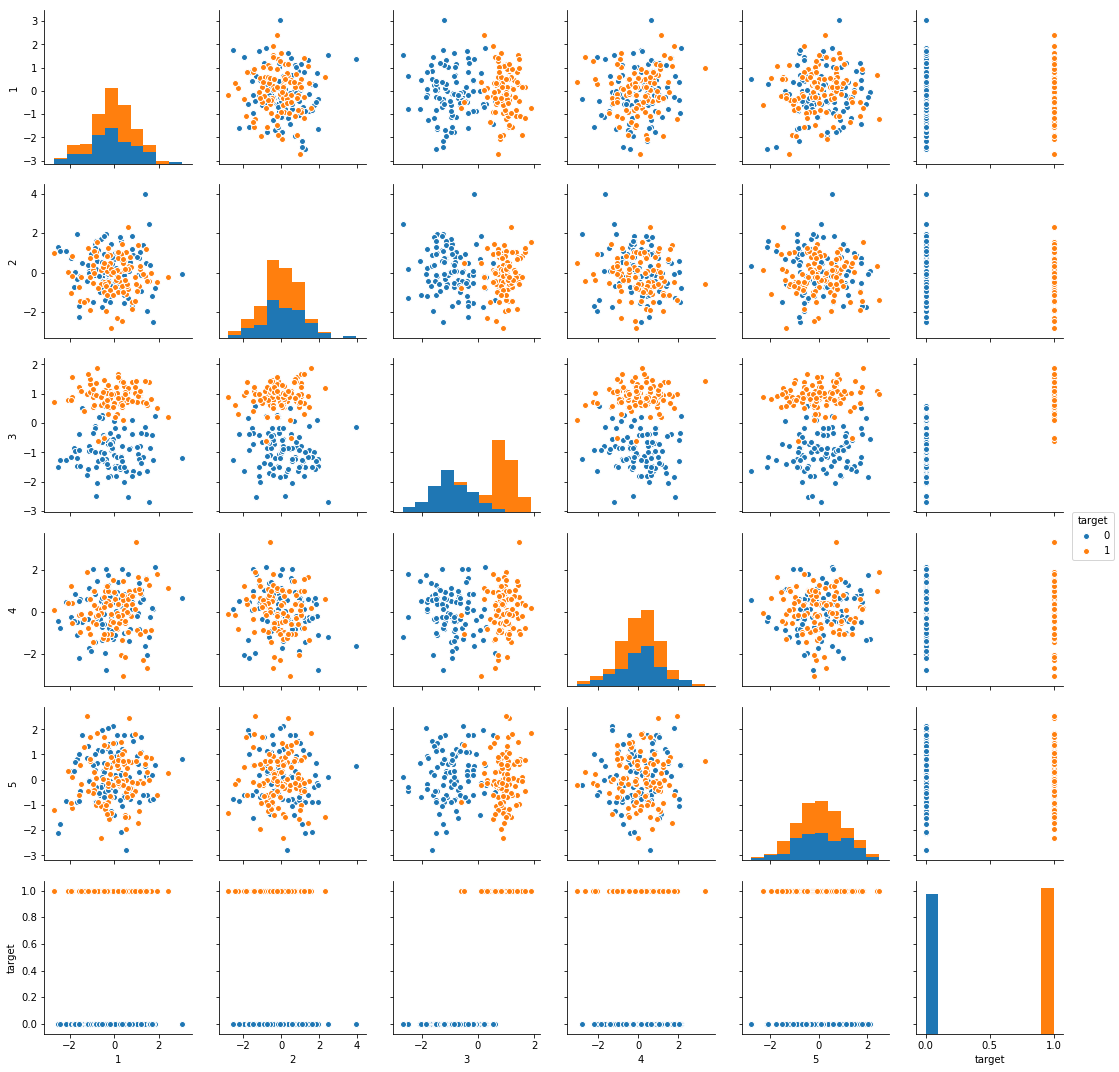

               1         2         3         4         5    target
1       1.000000 -0.031031  0.020010  0.101619  0.066507  0.044140
2      -0.031031  1.000000 -0.120638 -0.150303 -0.066695 -0.114025
3       0.020010 -0.120638  1.000000 -0.011984  0.013228  0.870262
4       0.101619 -0.150303 -0.011984  1.000000  0.035636  0.003292
5       0.066507 -0.066695  0.013228  0.035636  1.000000 -0.050785
target  0.044140 -0.114025  0.870262  0.003292 -0.050785  1.000000


In [204]:
from sklearn import datasets

sample_size = 200
data, target = datasets.make_classification(n_samples=sample_size, n_features=5, 
                                            n_informative=1, n_redundant=0, 
                                            n_repeated=0, n_classes=2, 
                                            n_clusters_per_class=1, 
                                            weights=None, flip_y=0.01, 
                                            class_sep=1.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=1)
#w = datasets.load_wine()
#data, target = w.data, w.target
visualize_corr(data, target)

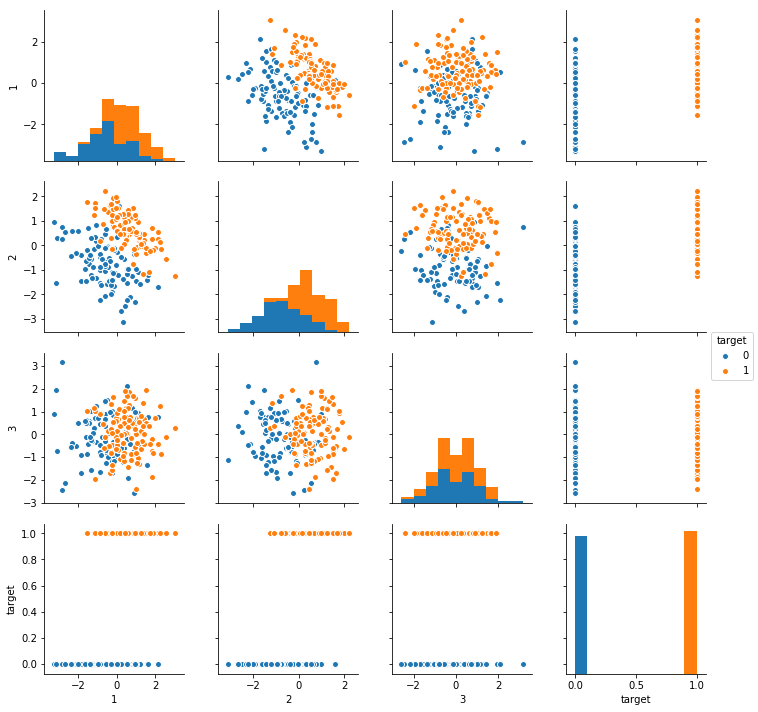

               1         2         3    target
1       1.000000  0.001111  0.000108  0.513087
2       0.001111  1.000000 -0.000118  0.647265
3       0.000108 -0.000118  1.000000  0.081559
target  0.513087  0.647265  0.081559  1.000000


In [210]:
PCA_data = principal_compnent_analysis(data, 3)
visualize_corr(PCA_data, target)

In [189]:
from sklearn import decomposition
PCA_decomposition = decomposition.PCA(n_components=3)
PCA_decomposition.fit(data)
print(PCA_decomposition.explained_variance_ratio_)
print(PCA_decomposition.singular_values_)

[ 0.46295901  0.18984165  0.14016472]
[ 25.92277064  16.59991619  14.26361152]


In [28]:
u, d, v = np.linalg.svd(data)

In [47]:
d

array([ 15.46458612,  14.47186016])

In [48]:
max_indices = np.argsort(d)
max_indices

array([1, 0])

In [49]:
w = v[max_indices[:m]]
w

array([[ 0.89756865,  0.44087471],
       [ 0.44087471, -0.89756865]])

In [50]:
m=2

In [51]:
data.dot(w)

array([[ 0.01526295,  2.76394516],
       [ 0.43944333, -1.13688658],
       [-1.97987691,  2.01082041],
       [ 1.31811695,  0.02174226],
       [-0.23435259, -1.40589682],
       [ 1.11715658,  2.15969145],
       [ 0.3142844 , -1.08227838],
       [-0.71190779,  0.66685364],
       [ 0.18975633, -0.92261198],
       [-0.85862237, -1.21545087],
       [ 1.42497646, -0.28063828],
       [-1.65852033,  0.8441533 ],
       [-0.07518709, -1.05593434],
       [-1.17686247,  0.40608666],
       [ 0.3749826 ,  1.10792745],
       [-1.490737  ,  0.66560728],
       [-0.58867427,  0.20610524],
       [-1.18476073,  1.42545579],
       [-0.22881154, -1.31592926],
       [ 1.31325659, -0.12794934],
       [ 0.05162094, -1.46558161],
       [ 0.76707418,  1.6309356 ],
       [ 1.15993642, -0.27469174],
       [-0.20914358, -1.14992504],
       [ 0.48300593,  0.43057856],
       [ 0.1306352 ,  1.13702388],
       [-0.19993284, -0.9948028 ],
       [ 0.32167045,  1.43516681],
       [ 0.26300618,

In [100]:
df[not 'target']

KeyError: False